
# An Example machine learning notebook

In [2]:
import pandas as pd
iris_data = pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_data = pd.read_csv('iris-data.csv',na_values=['NA'])

In [9]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,NaN
50%,5.700000,3.000000,4.350000,NaN
75%,6.400000,3.300000,5.100000,NaN
max,7.900000,4.400000,6.900000,2.500000


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

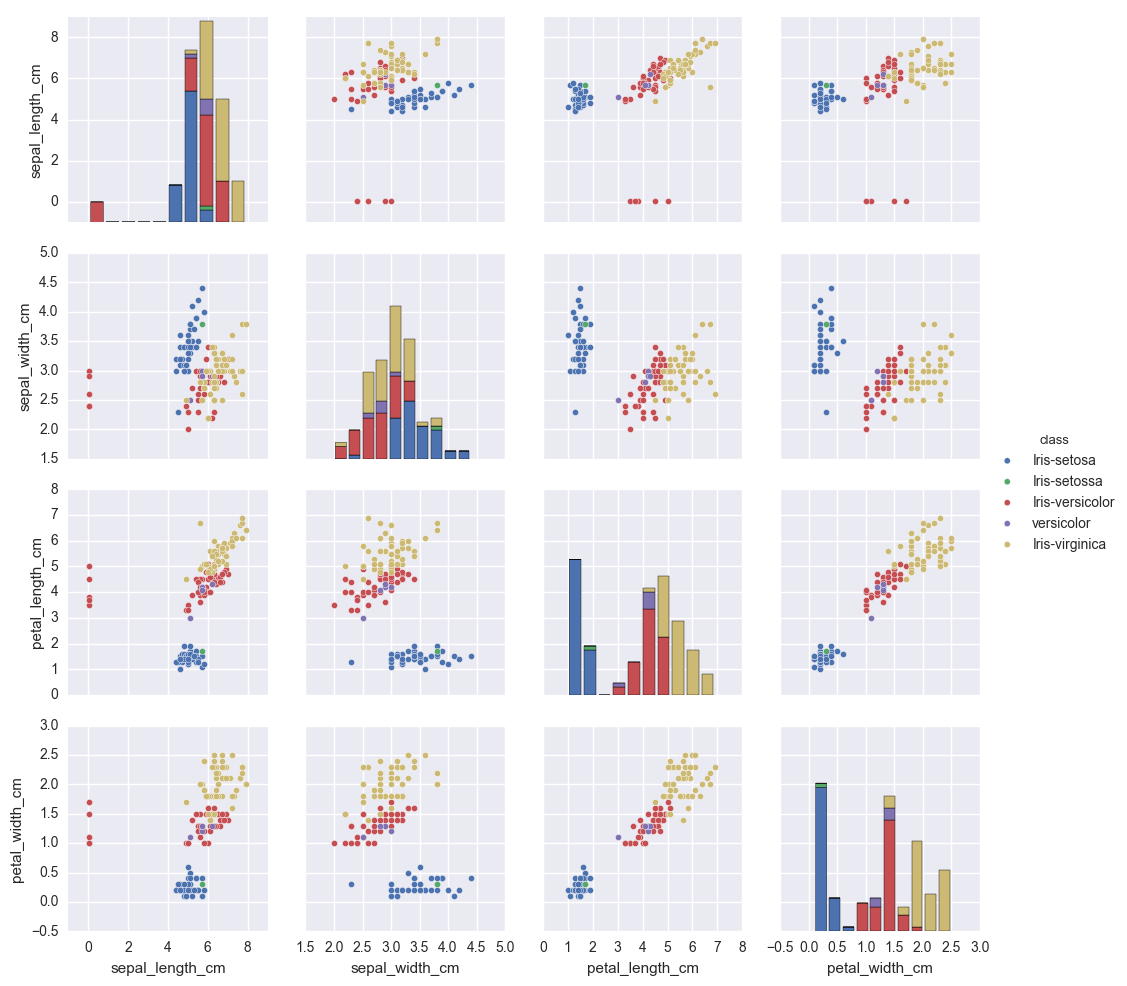

In [11]:
sb.pairplot(iris_data.dropna(),hue='class')

In [12]:
iris_data.loc[iris_data['class']=='versicolor','class']='Iris-versicolor'
iris_data.loc[iris_data['class']=='Iris-setossa','class']='Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

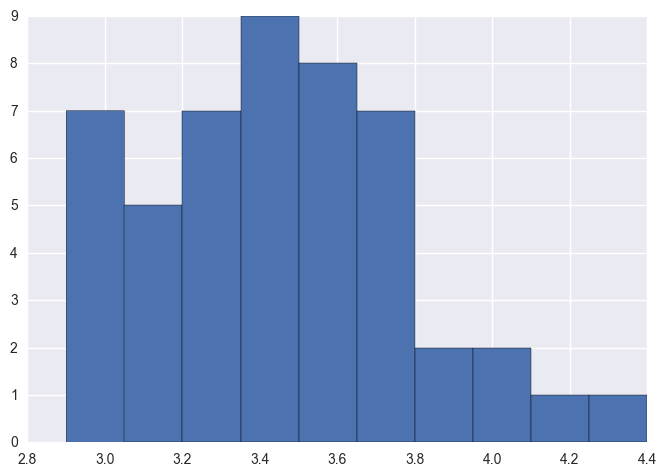

In [16]:
iris_data = iris_data.loc[(iris_data['class']!='Iris-setosa')| (iris_data['sepal_width_cm']>=2.5)]
iris_data.loc[iris_data['class']=='Iris-setosa','sepal_width_cm'].hist()

In [19]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor')&(iris_data['sepal_length_cm']<1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


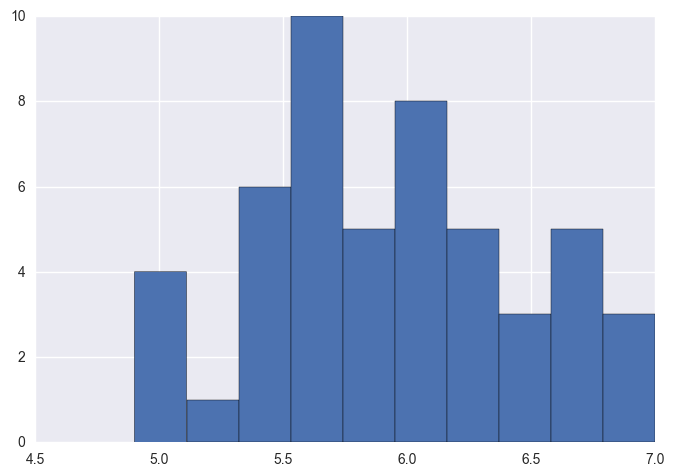

In [20]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [21]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


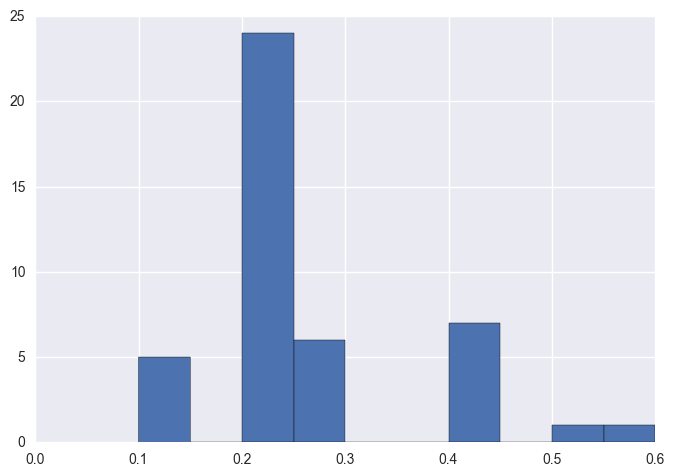

In [22]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()


In [23]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [24]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [27]:
iris_data.to_csv('iris-data-clean.csv',index=False)
iris_data_clean=pd.read_csv('iris-data-clean.csv')

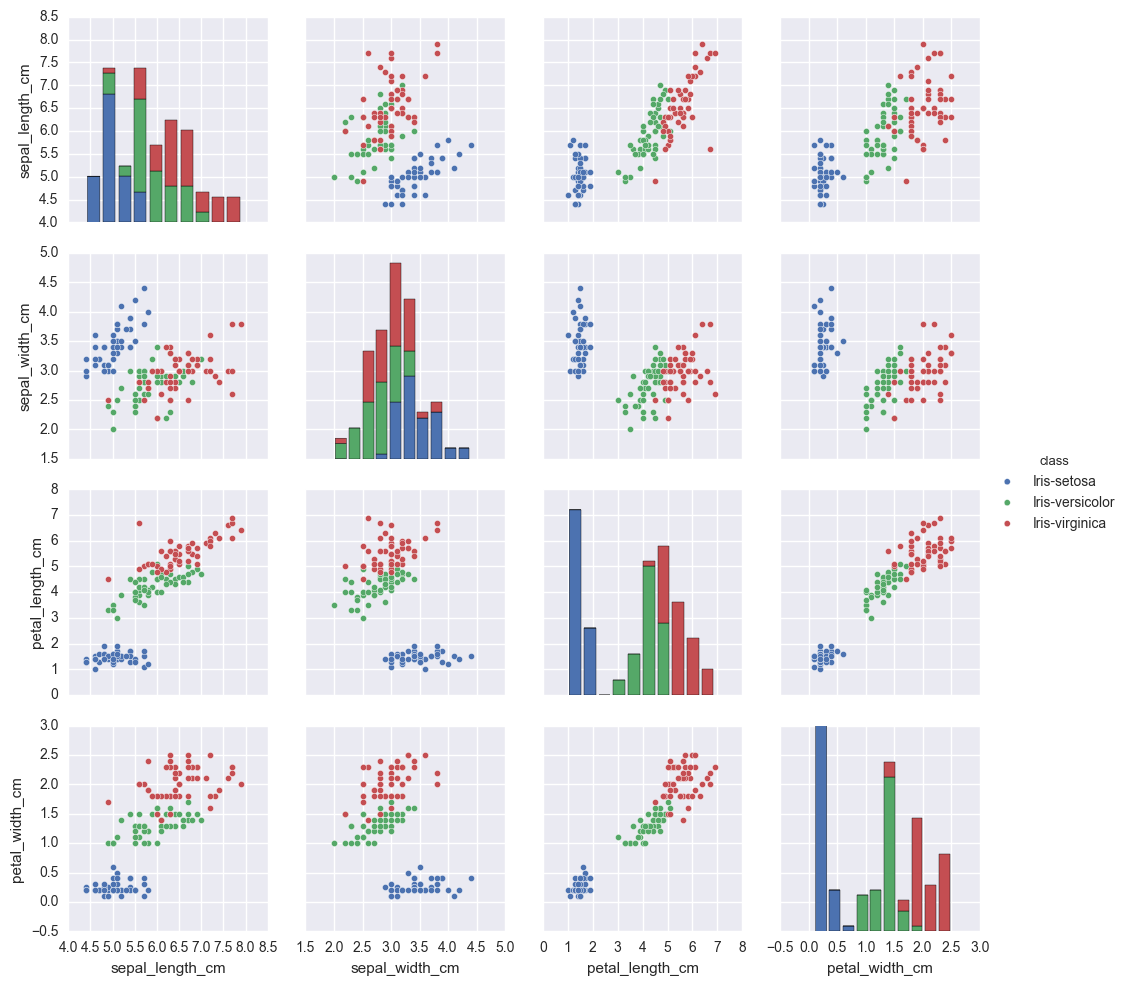

In [28]:
sb.pairplot(iris_data_clean,hue='class')

The general takeaways here should be:

Make sure your data is encoded properly

Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

Deal with missing data in one way or another: replace it if you can or drop it

Never tidy your data manually because that is not easily reproducible

Use code as a record of how you tidied your data

Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

In [29]:
assert len(iris_data_clean['class'].unique())==3

In [39]:
assert iris_data_clean.loc[iris_data_clean['class']=='Iris-versicolor','sepal_length_cm'].min()>=2.5

In [34]:
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

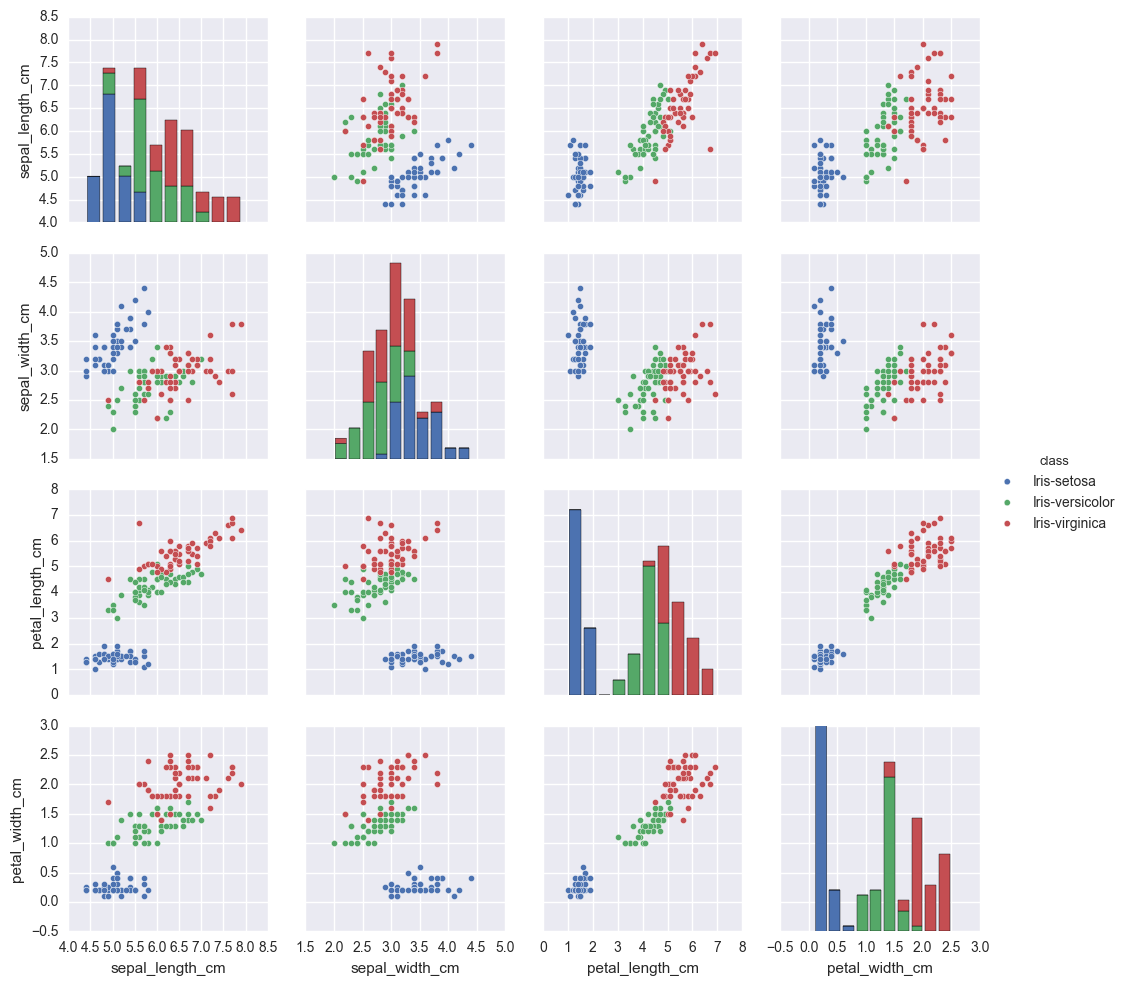

In [42]:
sb.pairplot(iris_data_clean, hue='class')

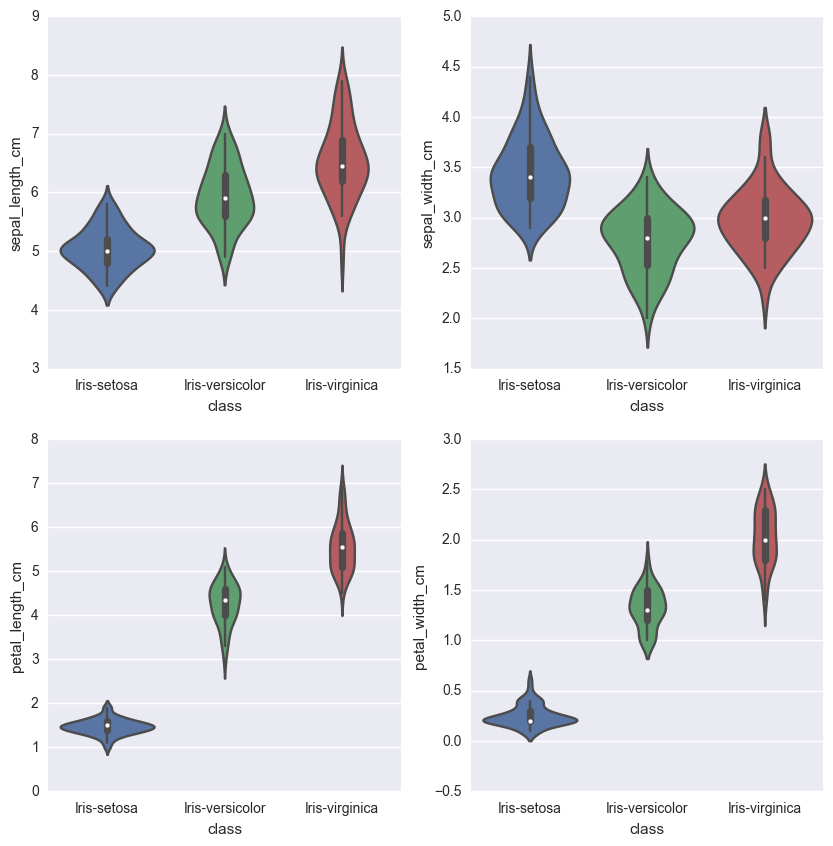

In [45]:
plt.figure(figsize=(10,10))
for column_index,column in enumerate(iris_data_clean.columns):
    if column =="class":
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class',y=column,data=iris_data_clean)

 Bad data leads to bad models.

In [46]:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the classes
all_classes = iris_data_clean['class'].values

In [48]:
all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [49]:
from sklearn.cross_validation import train_test_split
(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)

In [50]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs,training_classes)
decision_tree_classifier.score(testing_inputs,testing_classes)

0.97368421052631582

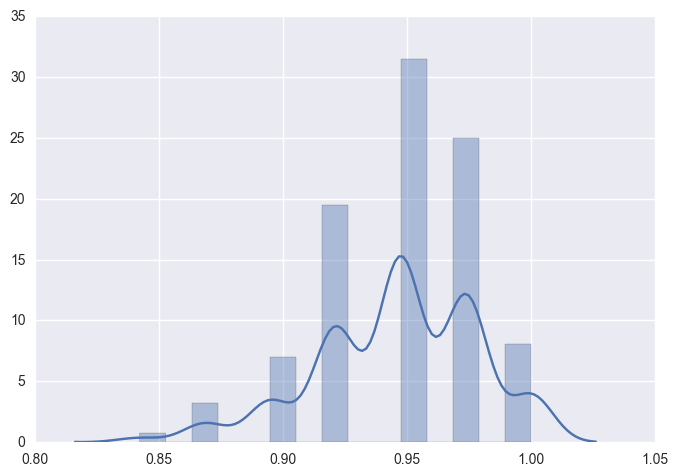

In [51]:
model_accuracies = []
for repeats in range(1000):
    (train_inputs,test_inputs,train_classes,test_classes)=train_test_split(all_inputs,all_classes,train_size=0.75)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(train_inputs,train_classes)
    classifier_accuracy = decision_tree_classifier.score(test_inputs,test_classes)
    model_accuracies.append(classifier_accuracy)
sb.distplot(model_accuracies)

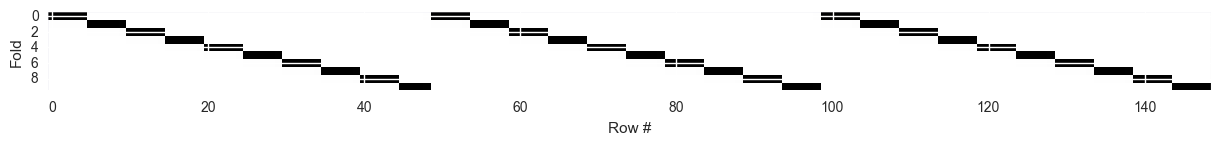

In [54]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
def plot_cv(cv,n_samples):
    masks= []
    for train ,test in cv:
        mask = np.zeros(n_samples,dtype=bool)
        mask[test]=1
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks,interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')
plot_cv(StratifiedKFold(all_classes,n_folds=10),len(all_classes))

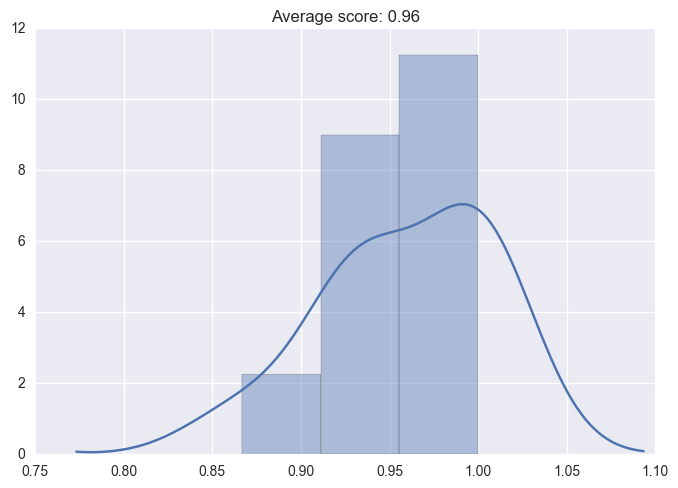

In [55]:

from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

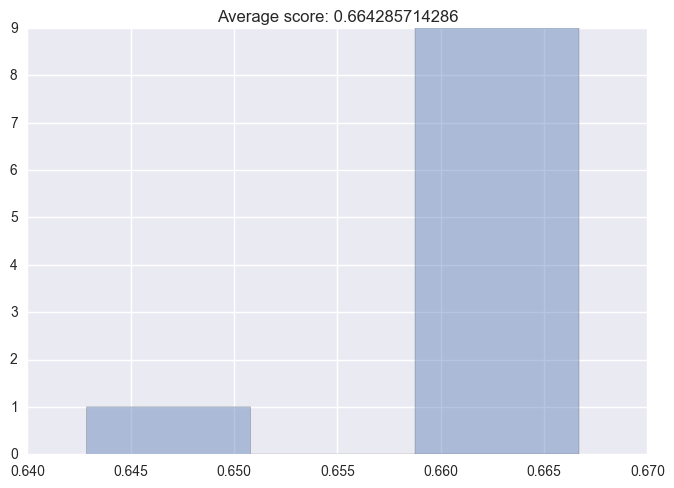

In [56]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [59]:
from sklearn.grid_search import GridSearchCV
decision_tree_classifier = DecisionTreeClassifier();
parameter_grid = {'max_depth':[1,2,3,4,5],
                 'max_features':[1,2,3,4]}
cross_validation = StratifiedKFold(all_classes,n_folds=10)
grid_search = GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_inputs,all_classes)
print('Best score:{}'.format(grid_search.best_score_))
print('Best parameters:{}'.format(grid_search.best_params_))

Best score:0.959731543624
Best parameters:{'max_features': 3, 'max_depth': 2}


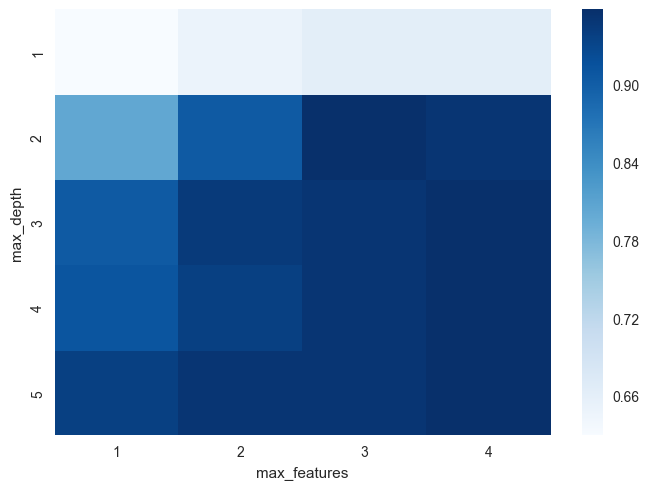

In [60]:
grid_visualization = []
for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
grid_visualization = np.array(grid_visualization)
grid_visualization.shape =(5,4)
sb.heatmap(grid_visualization,cmap='Blues')
plt.xticks(np.arange(4)+0.5,grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5,grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [61]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Best score: 0.96644295302
Best parameters: {'max_features': 3, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 3}


In [62]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [66]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

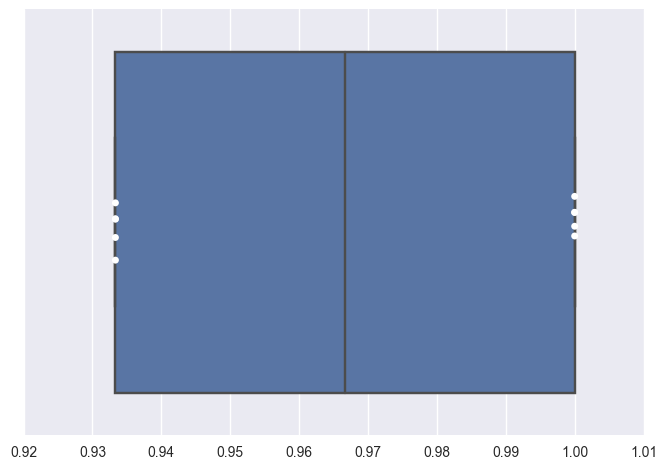

In [65]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='white')

In [67]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.973154362416
Best parameters: {'max_features': 3, 'n_estimators': 10, 'criterion': 'gini', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

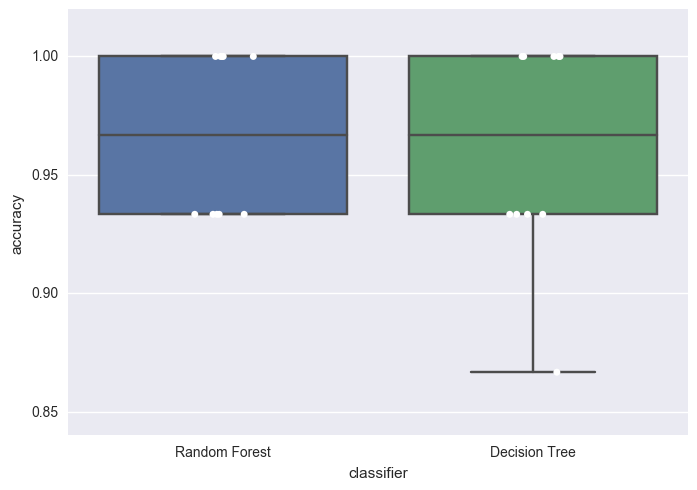

In [68]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

In [69]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

ERROR:root:Line magic function `%install_ext` not found.


[ 5.5  3.5  1.3  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.6  2.5  3.9  1.1]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 4.9  3.1  1.5  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 4.9  2.5  4.5  1.7]	-->	Iris-versicolor	(Actual: Iris-virginica)
[ 5.7  2.8  4.5  1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 7.6  3.   6.6  2.1]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 6.8  3.2  5.9  2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 5.7  3.8  1.7  0.3]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.6  3.   4.1  1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 4.9  3.1  1.5  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)


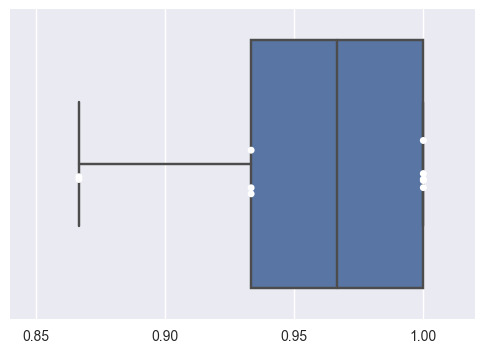

In [71]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))